## BIOB480/BIOE548 Final Project: Genomic analysis with `scikit-allel`

The following Jupyter Notebook provides Python code to perform simple analyses of genome-wide single nucleotide polymorphism (SNP) data using the powerful `scikit-allel` package. As part of the your final project in Conservation Genetics you will run each code chunk below, calculating a number of metrics we have discussed in class for the empirical dataset you selected, and recording answers to the bolded questions interspersed throughout. All data have been uploaded as [gzipped](https://en.wikipedia.org/wiki/Gzip) `.vcf` ("Variant Call Format") files in the `data/` directory. To begin, you'll first need to copy this notebook and save an editable version to your own student directory. I also recommend spend some time reviewing `scikit-allel`'s [documentation](https://scikit-allel.readthedocs.io/en/stable/#), paying particular attention to what functions look like and how they operate. 

**QUESTION 1:** Pick a function from the ["Statistics and plotting"](https://scikit-allel.readthedocs.io/en/stable/stats.html) section of `scikit-allel`'s docs. What are its parameters, and what do they mean?

Next, you should get familiar with the Jupyter Notebook environment. Find the buttons to run a chunk of code, change the format of a particular chunk (from Code—i.e., Python 3—to Markdown or Raw, which are used for writing), and save your work. Look also at the directory browser on the left-hand side of the notebook, and orient yourself to its structure. 

The last think we'll do before starting is import `scikit-allel`, along with the standard Python libraries `numpy`, `pandas`, and `os`:

In [36]:
import os
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introduction to Python

Though learning Python in any meaningful sense is far beyond what we can tackle in the last week of the semester, it will be useful to examine a few aspects of the language before diving into `scikit-allel`. (If you are motivated and have the time, I highly recommend [the Software Carpentries "Programming with Python" lesson](https://swcarpentry.github.io/python-novice-inflammation/#overview).)

We can start with some simple calculations, as any Python *interpreter* (i.e., an interface to enter Python code, like a Jupyter Notebook chunk) can mathematical operations:

In [5]:
0.2**2 # the double asterix operator exponentiates the following term

0.25

We can also assign numbers to variables using the "=" operator:

In [11]:
p = 0.2
q = 0.8
p**2 + 2*p*q + q**2

1.0000000000000002

Unlike other languages you might be familiar with (e.g., `R`), Python allows you to assign multiple values to variables using a comma:

In [13]:
p, q = 0.4, 0.6
p**2 + 2*p*q + q**2

1.0

Python also includes a set of built-in functions (i.e., functions you don't need to load via an external library). Useful ones to know include `print()`, `range()`, `list()`, `len()` and `type()`:

In [22]:
p = 0.5
print('The frequency of allele 1 is now', p)

The frequency of allele 1 is now 0.5


In [27]:
nums = list(range(0,10,1))
nums

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
len(nums)

10

Note that the object `nums` has a length of 10. This is because it is somethign known as an *list*, a data structure that can hold more than one variable at a time. We can confirm this using the `type()` function:

In [30]:
type(nums)

list

We can also use `type()` to determine what kind of numerical data is encoded by an object. Typically, this will be either a `float` (i.e., a floating-point number, with a decimal point) or an `integer` (a number without a decimal point). We can change from a `float` to an `integer` and back using the functions `int()` and `float()`:

In [31]:
type(p)

float

In [33]:
p = int(p)
type(p)

int

In [35]:
p = float(p)
type(p)

float

Text can be represented by a type of object known as a `String`:

In [65]:
text = "Conservation Genetics"

In [66]:
print(text)

Conservation Genetics


In [67]:
type(text)

str

Specialized libraries (equivalent to packages in `R`) include their own set of functions, which can be viewed by pressing tab after typing the library name and a period. We imported `numpy` with the nickname `np`. Here is one of its many functions, which takes the average of a list of numbers. 

In [38]:
np.average(nums)

4.5

**QUESTION 2:** Choose another `Numpy` funciton and explain its purpose. (You may use other sources.)

The last thing we'll introduce for now is the `help()` function. Its output is a little cryptic, but once you get oriented, can be useful for debugging:

In [41]:
help(np.average)

Help on _ArrayFunctionDispatcher in module numpy:

average(a, axis=None, weights=None, returned=False, *, keepdims=<no value>)
    Compute the weighted average along the specified axis.

    Parameters
    ----------
    a : array_like
        Array containing data to be averaged. If `a` is not an array, a
        conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which to average `a`.  The default,
        axis=None, will average over all of the elements of the input array.
        If axis is negative it counts from the last to the first axis.

        .. versionadded:: 1.7.0

        If axis is a tuple of ints, averaging is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    weights : array_like, optional
        An array of weights associated with the values in `a`. Each value in
        `a` contributes to the average according to its associated weight.
        

## Basic data structures and functions

Before we use empirical data, let's get a feel for scikit-allel's GenotypeArray objects using a simple example. Here, we set up a GenotypeArray with two individuals (as columns) and three loci (as rows). Each integer in this array refers to an allele, where 0 indicates the reference allele, 1 the first alternate allele, 2 the second, etc. Any negative integer indicates missing data. Notice that we are again using `.` after the package name (`allel`). This time, however, we are creating something called a class, which assigns a particular set of variables and associated functions (technically "methods") to the object at hand:

In [44]:
g = allel.GenotypeArray([[[0, 0], [0, 0]],
                         [[0, 0], [0, 1]],
                         [[0, 0], [1, 1]],
                         [[0, 1], [1, 1]],
                         [[1, 1], [1, 1]],
                         [[0, 0], [1, 2]],
                         [[0, 1], [1, 2]],
                         [[0, 1], [-1, -1]],
                         [[-1, -1], [-1, -1]]])

This is what that object looks like: 

In [46]:
g

<GenotypeArray shape=(9, 2, 2) dtype=int64>
0/0 0/0
0/0 0/1
0/0 1/1
...
0/1 1/2
0/1 ./.
./. ./.

Our GenotypeArray object "g" has attributes reflecting its dimensions, its number of variants, ploidy and sample size. For example: 

In [47]:
g.ndim

3

In [48]:
g.shape

(9, 2, 2)

In [49]:
g.n_variants

9

In [50]:
g.ploidy

2

In [51]:
g.n_samples

2

With this object, we can begin to get a feel for scikit-allel's functions for describing diversity and divergence. For example, we can calculate observed heterozygosity, generating an array for each locus:

In [52]:
het_obs = allel.heterozygosity_observed(g)

Using the `namean()` function in `numpy` to ignore NA values, we can calculate the genome-wide average:

In [53]:
np.nanmean(het_obs)

0.4375

A natural next step is to see whether these freququencies are a deviation from Hardy-Weinberg Equilibrium. To do so, we first calculate allele frequencies for each locus, using the `count_alleles().to_frequencies()` function. (Note that this is an example of of an object having a particular method—in this case, a method unique to the `GenotypeArray()` class.)

In [54]:
af = g.count_alleles().to_frequencies()

In [55]:
af

array([[1.  , 0.  , 0.  ],
       [0.75, 0.25, 0.  ],
       [0.5 , 0.5 , 0.  ],
       [0.25, 0.75, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.5 , 0.25, 0.25],
       [0.25, 0.5 , 0.25],
       [0.5 , 0.5 , 0.  ],
       [ nan,  nan,  nan]])

In this array, each row is a locus, and the columns 0,1 and 2 refer to reference, 1st alternate, and 2nd alternate alleles. Next, we can use these data to calculate expected heterozygosity:

In [56]:
allel.heterozygosity_expected(af, ploidy=2)

array([0.   , 0.375, 0.5  , 0.375, 0.   , 0.625, 0.625, 0.5  ,   nan])

Looks different to me! 

**QUESTION 3:** What is the length of object `af`?

## Loading and examining variant data

Next up, we're going to pivot to looking at empirical data: specifically, the SNP data associated with your project. These data are in Variant Call Format, and can be found as `*.vcf.gz` in the tutorial folder. 

To begin, we'll use scikit-allel to import the .vcf as a `numpy` array. Here, it's important to use the regex `'*'` wildcard, in order to extract all possible data from the file. (Note that you will need to replace `"data/species.vcf.gz"` with the path to your group's study taxon.)

In [117]:
file = "data/species.vcf.gz"
s = allel.read_vcf(file, fields='*')

FileNotFoundError: [Errno 2] No such file or directory: 'data/species.vcf.gz'

The `numpy` array object `r` has a set of keys representing aspects of the .vcf file. We can list these with the `.keys()` function, sorting by name:

In [60]:
sorted(s.keys())

['calldata/AD',
 'calldata/DP',
 'calldata/GL',
 'calldata/GT',
 'samples',
 'variants/AF',
 'variants/ALT',
 'variants/CHROM',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/NS',
 'variants/POS',
 'variants/QUAL',
 'variants/REF',
 'variants/altlen',
 'variants/is_snp',
 'variants/numalt']

Here, anything begining with "callset" is from the INFO field of the .vcf, while "variants" refers to data associated with each SNP (or site, if you have invariant alleles in your file). (Some of this information, e.g. depth, is redundant, depending on your SNP caller.) To examine any of these in greater detail, we can select the relevant index. For example, to look at the position of these SNPs (relative to the reference genome or sequence they were aligned to), we can select `variants/POS` key. Here, we use brackets with a `String` inside to select a column with a particular label:

In [68]:
s['variants/POS']

array([    200,     219,     494, ..., 2700936,   50420,   94020],
      dtype=int32)

Similarly, we can list all sample IDs, which in most cases will be filenames from one of the various bioinformatics processing steps used to generate the final `.vcf` file:

In [69]:
s['samples']

array(['EPAMB001.filter.sorted.dup', 'EPAMB002.filter.sorted.dup',
       'EPAMB006.filter.sorted.dup', 'EPAMB007.filter.sorted.dup',
       'EPAMB008.filter.sorted.dup', 'EPAMB010.filter.sorted.dup',
       'EPAMB012.filter.sorted.dup', 'EPAMB013.filter.sorted.dup',
       'EPAMB014.filter.sorted.dup', 'EPAMB016.filter.sorted.dup',
       'EPAMB018.filter.sorted.dup', 'EPAMB019.filter.sorted.dup',
       'EPAMB020.filter.sorted.dup', 'EPAMB022.filter.sorted.dup',
       'EPAMB029.filter.sorted.dup', 'EPAMB030.filter.sorted.dup',
       'EPAUS001.filter.sorted.dup', 'EPAUS002.filter.sorted.dup',
       'EPAUS004.filter.sorted.dup', 'EPAUS010.filter.sorted.dup',
       'EPAUS011.filter.sorted.dup', 'EPAUS015.filter.sorted.dup',
       'EPAUS016.filter.sorted.dup', 'EPAUS017.filter.sorted.dup',
       'EPAUS018.filter.sorted.dup', 'EPAUS019.filter.sorted.dup',
       'EPAUS020.filter.sorted.dup', 'EPAUS022.filter.sorted.dup',
       'EPAUS023.filter.sorted.dup', 'EPAUS024.filter.sorted.d

Besides simply *looking* at these data, these keys can be used to filter SNPs based on various criteria. First, though, you may want to know how many SNPs you acutally have. We can evaluate this by taking the first entry from the `shape` attribute of the array (i.e., its length): 

In [70]:
s['calldata/GT'].shape[0]

4596

Next, let's take the actual genotype calls from the vcf-turned-numpy-array and turn it into the GenotypeArray object we're familiar with:

In [71]:
gt = s['calldata/GT']
gt = allel.GenotypeArray(gt)
gt

<GenotypeArray shape=(4596, 110, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/1 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 1/0 0/0 ... 0/0 0/0 1/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 1/1 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 1/1 0/0 ... 0/0 0/0 0/0 0/0 1/0

**QUESTION 4:** How many samples are in your dataset?

## Metrics of Genetic Giversity

Let's calculate the frequencies of different alleles (SNPs) using the `count_alleles().to_frequencies()` function introduced above, saving them to a new object. 

In [72]:
af_gt = gt.count_alleles().to_frequencies()
af_gt

array([[0.94444444, 0.05555556],
       [0.98058252, 0.01941748],
       [0.91176471, 0.08823529],
       ...,
       [0.91284404, 0.08715596],
       [0.93055556, 0.06944444],
       [0.64220183, 0.35779817]])

We can select a single site using brackets—for example, the following line of code gives us the frequencies of the two alleles at the first site in the genome:

In [73]:
af_gt[1]

array([0.98058252, 0.01941748])

We can use the following function to calculate *observed* heterozygosity at one or more SNPs, again using brackets to select a particular location in the genome:

In [74]:
h_o = allel.heterozygosity_observed(gt)[32] #this selects the SNP at site 32
h_o

0.2727272727272727

The function `allel.heterozygosity_expected` works similarly: 

In [75]:
h_e = allel.heterozygosity_expected(af_gt, ploidy=2)[32] #this selects the SNP at site 32
h_e

0.27371900826446294

Recall that $F_{IS}=1-\frac{H_O}{H_E}$. We therefore have enough to calculate the value of the inbreeding coefficient for any locus:

In [76]:
 allel.inbreeding_coefficient(gt)[32]

0.0036231884057976727

**QUESTION 5:** In a new code chunk, calculate $H_0$, $H_E$, and $F_{IS}$ for SNPs at positions 6, 19, and 72, recording your results.

Another basic descriptive task in conservation and population genetics is assessing the diversity across loci in a set of samples. Our empiricial data have already been filtered down to variant sites, so we'll work with the simple genotype array we designated `g` above to get a hang of how a few functions work. Let's start by calculating $\pi$, or the average number of pairwise differences between all possible pairs of sampled haploid genomes. First, we need to convert our genotype array into counts of each allele at each position. (Note that the maximum value will be 2N=4.)

In [77]:
g_ac = g.count_alleles()
g_ac

<AlleleCountsArray shape=(9, 3) dtype=int32>
4 0 0
3 1 0
2 2 0
...
1 2 1
1 1 0
0 0 0

There are 9 sites in this allele count array. Let's imagine they correspond to positions 2,4,7,14,15,18,19, and 27 in a reference genome that is 32 nucleotides long. We can indicate this with an array assigned to `pos`, and then calculate $\pi$ using the function `allel.sequence_diversity()`. (Note that positions 1 through 31 indicate the stretch of the genome these SNPs are taken from, including invariant sites.)

In [78]:
pos = [2, 4, 7, 14, 15, 18, 19, 25, 27]
pi = allel.sequence_diversity(pos, g_ac, start=1, stop=31)
pi

0.13978494623655915

Another useful metric of diversity is the mean number of pairwise differences for a particular locus. For SNP data, this is equivalent to comparing each allele in each individual and scoring them as 0 (no difference) or 1 (different alleles). We can calculate this for all SNPs in our empirical data

In [79]:
gt_ac = gt.count_alleles()
dif = allel.mean_pairwise_difference(gt_ac)
dif

array([0.10542636, 0.03826664, 0.16169226, ..., 0.15985287, 0.12984496,
       0.46167505])

**QUESTION 6:** The basic Python 3 function `max()` calculates the maximum value of a given array. What is the largest mean pairwise difference value in your dataset?

## Linkage Disequilibrium 

Recall that linkage disequilibrium—the association of alleles at different loci at great—is typically measured by the metric $D$. A related metric, $r$, [can be interpreted as the correlation between two diploid genotypes](https://doi.org/10.1534/genetics.108.093153). We can calculate this for our empirical data after first manipulating our genotype array to instead display the number of non-reference alleles (i.e., we are coding diploid genotypes for each individual at each SNP by the number of alleles they have that are different than the reference genome):

In [81]:
gt_subset = gt[1:50]
gt_an = gt_subset.to_n_alt(fill=-1)
gt_an[41]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,
        1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0], dtype=int8)

A seperate function returns a matrix of pairwise (sample to sample) LD values: 

In [82]:
ld = allel.rogers_huff_r(gt_an)
ld

array([-0.09450352, -0.04255319, -0.0695048 , ..., -0.0667071 ,
       -0.0667071 , -0.03809524], dtype=float32)

We can plot these using a built in function: 

<Axes: >

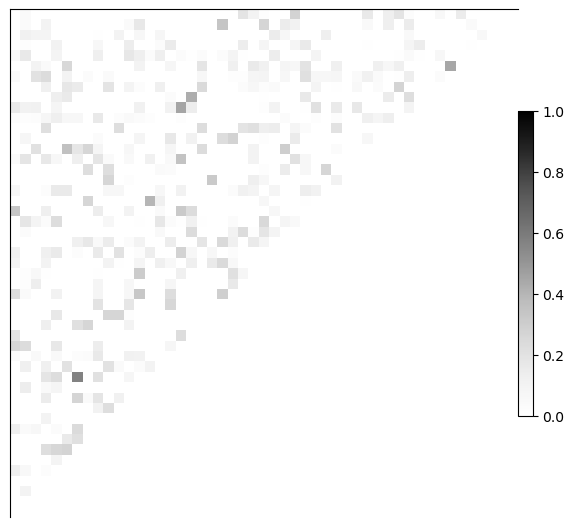

In [83]:
allel.plot_pairwise_ld(ld, colorbar=True, ax=None, imshow_kwargs=None)

**QUESTION 7:** What is the largest value of $r$ in your dataset? Is it low or high?

Let's plot a histogram of these same data. What do you notice?

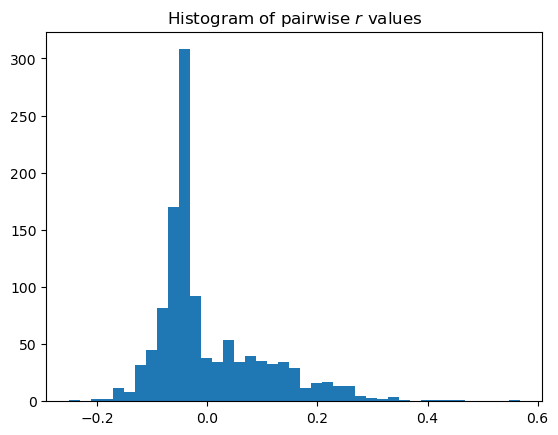

In [84]:
plt.hist(ld, bins='auto') # arguments are passed to np.histogram
plt.title("Histogram of pairwise $r$ values")
plt.show()

## Population Subdivision

Most (all?) of your datasets include samples from multiple, geographically isolated populations. Properly analyzing these data would require linking sample IDs to specific populations, which should be possible, but is difficult to standardize across datasets for our purposes. Therefore, you can decide to choose one of two options to estimate $F_{ST}$ for your dataset: 1) an arbitrary assignment of samples to "subpopulations"; or 2) accurately assigning individuals to subpopulations on the basis of the source paper and / or other files in the [Dryad repository linked on GitHub](https://github.com/elinck/conservation_genetics). 

For the first option, we will arbitrarily divide our samples and associated alelle count arrays into two groups: 

In [85]:
first_half = int(gt.n_samples/2) # select a sample number half-way through the total number of samples
second_half = int(gt.n_samples) # select the final sample
subpops = list(range(first_half)), list(range(first_half+1,second_half)) # assign subpopulations as a list of sample numbers
gt_ac1 = gt.count_alleles(subpop=subpops[0]) # calculate allele counts for the first "subpopulation"
gt_ac2 = gt.count_alleles(subpop=subpops[1]) # calculate allele counts for the second "subpopulation"
num, den = allel.hudson_fst(gt_ac1, gt_ac2) # calculate the numerator and denominator for FST for each SNP
fst = np.sum(num) / np.sum(den) # calculate average FST by summing over all SNPs
fst

0.001327916669905029

**QUESTION 8:** What is the genome-wide average $F_{ST}$ value for your data? Why is it so low? 

Recall that we loaded our `vcf` files as an object called `s`. Among its attributes is a list of samples—let's display the first 5 sample names as an array:

In [86]:
s['samples'][0:5]

array(['EPAMB001.filter.sorted.dup', 'EPAMB002.filter.sorted.dup',
       'EPAMB006.filter.sorted.dup', 'EPAMB007.filter.sorted.dup',
       'EPAMB008.filter.sorted.dup'], dtype=object)

By inspecting this file and comparing it to background information, we can theoretically assign individuals to actual subpopulations by their index. If possible, modify the following code to do so, calculating $F_{ST}$ between two of separate populations in your study. (If there are no lists of sample IDs / localities available, you may select another random subset.)

In [87]:
subpops2 = [[0,1,2,3,4],[90,91,92,93,94]] # this would assign individuals 0-4 and 90-94 to two different subpopulations; edit as needed
gt_ac1_v2 = gt.count_alleles(subpop=subpops2[0]) 
gt_ac2_v2 = gt.count_alleles(subpop=subpops2[1]) 
num, den = allel.hudson_fst(gt_ac1_v2, gt_ac2_v2) 
fst = np.sum(num) / np.sum(den) 
fst

0.01355434755754058

**QUESTION 9:** Is this $F_{ST}$ value higher or lower than your answer to **QUESTION 8**?

Let's also calculate *per variant* $F_{ST}$—this way, we can see whether certain SNPs / loci are outliers (and thus potentially under selection). T

In [88]:
np.seterr(divide='ignore', invalid='ignore') # allow division by zero
fst = num / den 
fst = fst[~np.isnan(fst)] # drop nan values

As with our LD values, we can plot a histogram of per-SNP $F_{ST}$: 

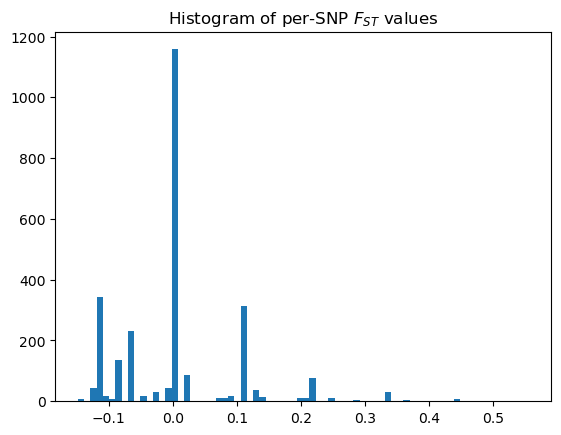

In [89]:
plt.hist(fst, bins='auto')
plt.title("Histogram of per-SNP $F_{ST}$ values")
plt.show()

**QUESTION 10:** What is the maximum $F_{ST}$ value in your dataset? Be precise (i.e., use a function and don't just eyeball the plot). For an extra challenge, determine its position in your dataset.

## Principal Component Analysis

To conclude, we'll perform Principal Component Analysis (PCA) on our data. Though we did not explicitly cover PCA in class, it is a ubiquitous approach to extracting patterns from highly multivariate datsets (like genotypes from thousands of SNPs and hundreds of samples) that involves placing samples on new, "synthetic" axes that explain the majority of variation in the data. A brief introduction to [PCA is here](https://en.wikipedia.org/wiki/Principal_component_analysis); arguably its most famous use in population genetics is [this 2008 paper](https://www.nature.com/articles/nature07331) in *Nature* by John Novembre and colleagues. PCA is most useful when we know the identity of each plotted sample, but even without going through the necessary steps to do so with our own data, the patterns it reveals can be informative. 

`scikit-allel` has a built-in PCA function, which is straightforward to implement once we are sure our data are complete (i.e., have no missing values). To do so, we'll start by counting alleles as before:

In [92]:
ac_sub = gt.count_alleles() # count alleles
ac_sub

<AlleleCountsArray shape=(4596, 2) dtype=int32>
204  12
202   4
186  18
...
199  19
201  15
140  78

Because some of the datasets include invariant sites, which will cause problems with PCA, we need to drop them from the object. To do so, we will combine `Numpy's` `np.nonzero` function with the `is_variant` method of `allel`'s genotype datastructures. (The "0" below makes sure we end up with a single array; don't worry about it.)

In [103]:
indices = np.nonzero(ac_sub.is_variant())[0]

Once we have these values, we can use the `take` method of genotype datastructures to subset them:

In [104]:
indices = np.nonzero(ac_sub.is_variant())[0] # identify only variant sites
genotypes_pca = gt.take(indices, axis=0) # subset genotypes to variants

We can then check to see whether any sites were dropped by comparing the dimensions of data before and after filtering:

In [105]:
before = len(gt)
after = len(genotypes_pca)
SNPs_dropped = before - after
SNPs_dropped

1

(Depending on your dataset, this value may be zero.)

Our last data preparation step is to transform our data to an array counts of *alternate* alleles—i.e., alleles that are different than the reference sequence reads were aligned to during sequence assembly:

In [114]:
gn = genotypes_pca.to_n_alt()
gn

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int8)

Now it's time to run PCA itself. Note that we are saving informaiton on the model used to run it in the second variable.

In [115]:
coords, model = allel.pca(gn) # run pca

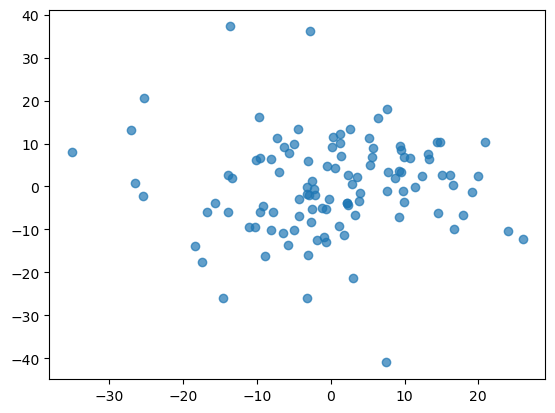

In [116]:
plt.scatter(coords[:, 0], # position on the first principal component of the observations
            coords[:, 1], alpha=0.7);

**QUESTION 11:** Interpret this PCA. Do you see distinct clusters, suggesting groups of samples that are closely related to each other, or do you see largely continuous variation? What biological processes relevant to your study taxon might help explain these patterns? Do your results match conclusions in the paper? 

That's the end of your brief tour of `scikit-allel`! We have, of course, only scratched the surface of what you can do with sequence data in Python. If you are motivated, feel free to add new code chunks below and perform an addititional analysis or data visualization on your dataset using any resource you wish for help. If your work is successful and you document it with a screenshot or by copy / pasting code and output, I'll give you extra credit (**QUESTION 12**)!